In [21]:
!pip install wbdata pandas
!pip install xlsxwriter


In [22]:
import wbdata
import pandas as pd
from datetime import datetime

In [23]:
# Define the countries and indicators
countries = ['US', 'CN', 'IN', 'DE', 'JP']  # Example: United States, China, India, Germany, Japan
indicator = {'NY.GDP.MKTP.CD': 'GDP (current US$)'}  # GDP indicator

# Define the date range
start_date = datetime(2015, 1, 1)
end_date = datetime(2023, 1, 1)

# Fetch data from the World Bank
data = wbdata.get_dataframe(indicator, country=countries, date=(start_date, end_date))

# Reset the index to ensure all columns are in the dataframe
data.reset_index(inplace=True)

# Preview the data
print(data.head())

# Save the data to a CSV file for further processing
data.to_csv('world_bank_gdp_data.csv', index=False)

  country  date  GDP (current US$)
0   China  2023       1.779478e+13
1   China  2022       1.788178e+13
2   China  2021       1.782046e+13
3   China  2020       1.468774e+13
4   China  2019       1.427997e+13


In [24]:
import pandas as pd

# Load the World Bank data
gdp_data = pd.read_csv('world_bank_gdp_data.csv', parse_dates=['date'])

# Perform any necessary transformations
gdp_summary = gdp_data.pivot(index='date', columns='country', values='GDP (current US$)')

# Generate a simple summary report
print(gdp_summary.head())

# Example: Save the summary to an Excel file
with pd.ExcelWriter('gdp_summary_report.xlsx', engine='xlsxwriter') as writer:
    gdp_summary.to_excel(writer, sheet_name='GDP Summary')

    # Add some formatting
    workbook = writer.book
    worksheet = writer.sheets['GDP Summary']
    currency_format = workbook.add_format({'num_format': '$#,##0'})
    worksheet.set_column('B:F', None, currency_format)

print("GDP Summary report generated successfully.")


country            China       Germany         India         Japan  \
date                                                                 
2015-01-01  1.106157e+13  3.357586e+12  2.103588e+12  4.444931e+12   
2016-01-01  1.123331e+13  3.469853e+12  2.294797e+12  5.003678e+12   
2017-01-01  1.231049e+13  3.690849e+12  2.651474e+12  4.930837e+12   
2018-01-01  1.389491e+13  3.974443e+12  2.702930e+12  5.040881e+12   
2019-01-01  1.427997e+13  3.889178e+12  2.835606e+12  5.117994e+12   

country     United States  
date                       
2015-01-01   1.829502e+13  
2016-01-01   1.880491e+13  
2017-01-01   1.961210e+13  
2018-01-01   2.065652e+13  
2019-01-01   2.152140e+13  
GDP Summary report generated successfully.


In [25]:
# Calculate Year-over-Year GDP Growth Rate
gdp_growth_rate = gdp_summary.pct_change() * 100

# Rename columns for clarity
gdp_growth_rate.columns = [f'{col} GDP Growth Rate (%)' for col in gdp_growth_rate.columns]

# Preview the growth rate data
print(gdp_growth_rate.head())

# Save the growth rate data to an Excel file
with pd.ExcelWriter('gdp_growth_rate_report.xlsx', engine='xlsxwriter') as writer:
    gdp_growth_rate.to_excel(writer, sheet_name='GDP Growth Rate')

    # Add percentage formatting
    workbook = writer.book
    worksheet = writer.sheets['GDP Growth Rate']
    percentage_format = workbook.add_format({'num_format': '0.00%'})
    worksheet.set_column('B:F', None, percentage_format)

print("GDP Growth Rate report generated successfully.")


            China GDP Growth Rate (%)  Germany GDP Growth Rate (%)  \
date                                                                 
2015-01-01                        NaN                          NaN   
2016-01-01                   1.552592                     3.343704   
2017-01-01                   9.589135                     6.369021   
2018-01-01                  12.870457                     7.683712   
2019-01-01                   2.771236                    -2.145351   

            India GDP Growth Rate (%)  Japan GDP Growth Rate (%)  \
date                                                               
2015-01-01                        NaN                        NaN   
2016-01-01                   9.089636                  12.570432   
2017-01-01                  15.542874                  -1.455734   
2018-01-01                   1.940633                   2.231742   
2019-01-01                   4.908623                   1.529751   

            United States GDP Gr

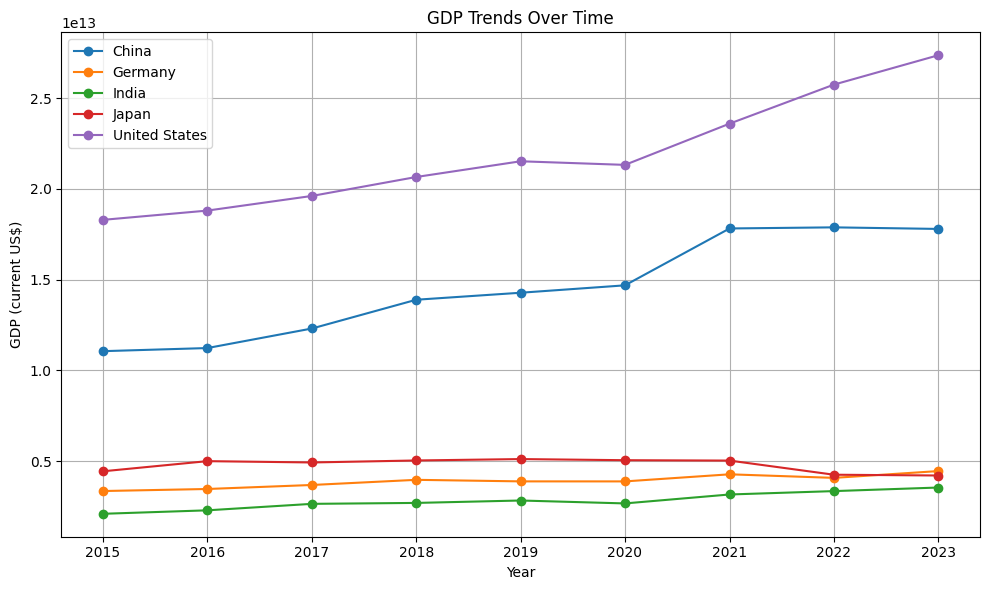

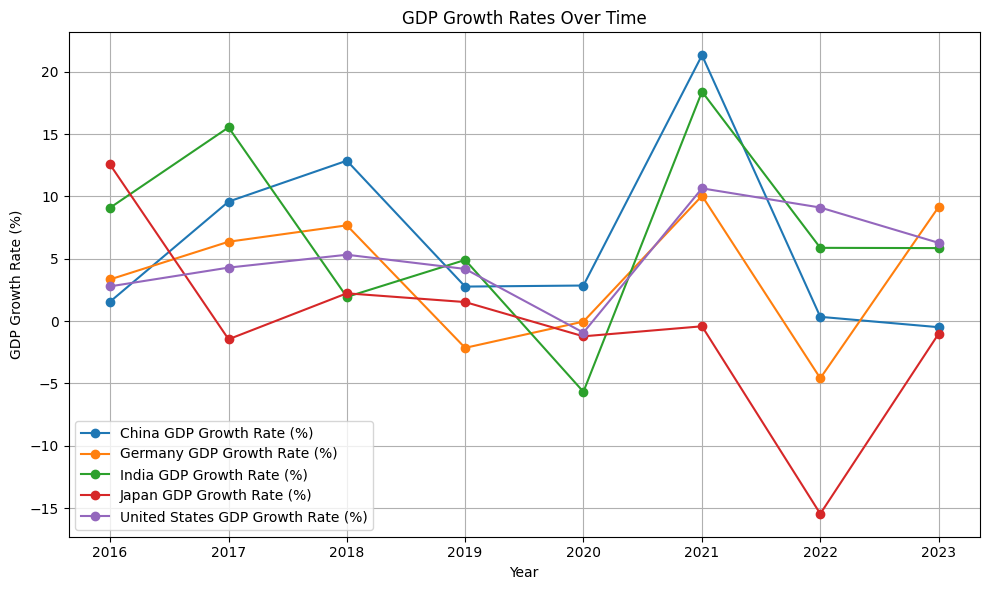

In [26]:
import matplotlib.pyplot as plt

# Plot GDP Trends for each country
plt.figure(figsize=(10, 6))
for country in gdp_summary.columns:
    plt.plot(gdp_summary.index, gdp_summary[country], marker='o', label=country)

plt.title('GDP Trends Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('gdp_trends.png')
plt.show()

# Plot GDP Growth Rates for each country
plt.figure(figsize=(10, 6))
for country in gdp_growth_rate.columns:
    plt.plot(gdp_growth_rate.index, gdp_growth_rate[country], marker='o', label=country)

plt.title('GDP Growth Rates Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('gdp_growth_rate_trends.png')
plt.show()


In [27]:
with pd.ExcelWriter('combined_financial_report.xlsx', engine='xlsxwriter') as writer:
    # Write GDP Summary
    gdp_summary.to_excel(writer, sheet_name='GDP Summary')
    worksheet = writer.sheets['GDP Summary']
    currency_format = writer.book.add_format({'num_format': '$#,##0'})
    worksheet.set_column('B:F', None, currency_format)

    # Write GDP Growth Rates
    gdp_growth_rate.to_excel(writer, sheet_name='GDP Growth Rate')
    worksheet = writer.sheets['GDP Growth Rate']
    percentage_format = writer.book.add_format({'num_format': '0.00%'})
    worksheet.set_column('B:F', None, percentage_format)

    # Insert GDP Trend Chart
    worksheet = writer.sheets['GDP Summary']
    worksheet.insert_image('H2', 'gdp_trends.png')

    # Insert GDP Growth Rate Chart
    worksheet = writer.sheets['GDP Growth Rate']
    worksheet.insert_image('H2', 'gdp_growth_rate_trends.png')

print("Combined financial report generated successfully.")


Combined financial report generated successfully.


In [28]:
def generate_combined_report():
    # Data ingestion and processing (as shown in previous steps)
    # Visualization and report generation

    print("Combined financial report generated successfully.")

if __name__ == "__main__":
    generate_combined_report()


Combined financial report generated successfully.
